In [1]:
import scipy.integrate as ode
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = 1
sig = 0.4

def df_dt(t,u):
    return s * u - sig * u**3

f0 = 2
d = ode.solve_ivp(df_dt,[0,10],[4])

We suppose the solution writes as:
$$
N(t,z) = \rho(t)\frac{\sqrt{f(t)}}{\sqrt{2\pi}} \exp{(-\frac{f(t)}{2}(z-\mu(t))^2)}
$$

We have the following system of ODEs 

$$
\begin{cases}
f'(t) = 2s(t)f(t)-2\sigma f(t)^3\\
\mu'(t) = 2 \frac{s(t)}{f(t)}(\theta(t) - \mu(t)) \\
\rho^{\prime}(t) = \rho(t) \Big[ s(t) \Big( \theta(t) (\mu(t) - \theta(t)) - 1 \Big) + r_{max} - \kappa \rho(t) + \sigma f(t) (f(t) - 1) \Big]
\end{cases}
$$

In [10]:
N = 200
a, b = [0, 10]
dz = (b - a) / N
Z = np.linspace(a, b, N)
theta = 4.5
s = 1
sigma = 0.25
kappa = 1
r_max = 1
noise_std = 0.05


In [4]:
def mean(Z, U):
    return np.sum(U * Z, axis=-1) / np.sum(U, axis=-1)

def var(Z, U):
    mu = mean(Z, U)
    return np.sum(U * Z**2, axis=-1) / np.sum(U, axis=-1) - mu**2 

def source_normal(Z, mu=5, sigma=0.5):    
    return (.5 / (2 * np.pi * sigma**2)**.5) * np.exp(-0.5 * ((Z - mu)**2) / sigma**2)

In [5]:
N_0 = source_normal(Z, sigma=sigma)
f_0 = 1 / var(Z, N_0)
mu_0 = mean(Z, N_0)
rho_0 = ode.trapz(N_0)
T_start = 0
T_end = 20
dt = 0.02
NbT = int(T_end / dt)
dts = np.linspace(T_start, T_end, NbT)

In [14]:
# U = [f,mu,rho]

def eval_fun(t,u):
    theta = np.random.normal(0,0.05)
    f, mu, rho = u
    eval_f = 2 * (s * f - sigma * f**3)
    eval_mu = 2 * (s / f) * (theta - mu)
    
    tmp_rho = s * (theta * (mu - theta) - 1) + sigma * f * (f - 1) + r_max - kappa * rho
    eval_rho = rho * tmp_rho
    
    return [eval_f, eval_mu, eval_rho]

solver = ode.solve_ivp(eval_fun, [T_start, T_end], [f_0, mu_0, rho_0], t_eval=dts)

In [15]:
# f = solver.y[0]
# mu = solver.y[1]
# rho = solver.y[2]
f, mu, rho = solver.y

N = rho[-1] * (np.sqrt(f[-1]) / (np.sqrt(2 * np.pi))) * np.exp(- (f[-1] / 2) * (Z - mu[-1])**2)


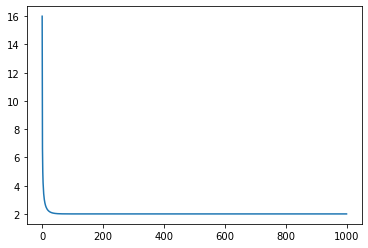

In [16]:
plt.plot(f)

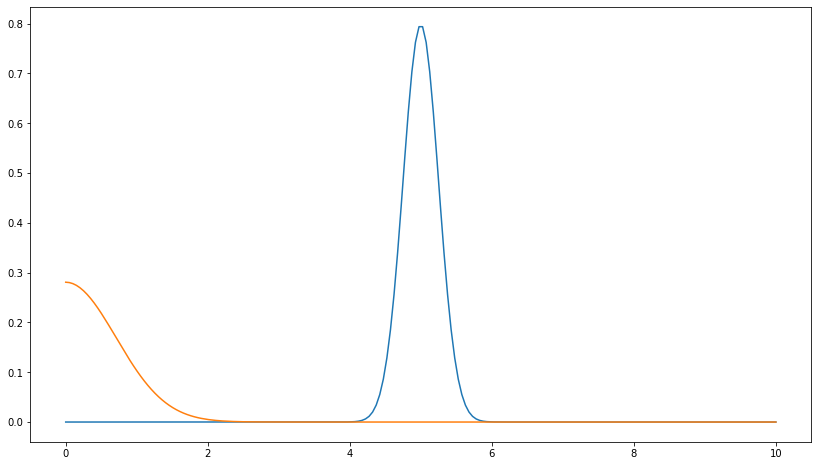

In [17]:
plt.figure(figsize = (14,8))
plt.plot(Z,N_0)
plt.plot(Z,N)
plt.show()